# Chapter 4 - Simulating migrating cardiac progenitor cells

As there is no way to establish a ground-truth trajectory for the time-lapsed-microscopy movies I was using, I chose to use simulated data to train and test the tracking methods I developed.

In brief, I used a defined function as the base trajectory, after which I 

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## I defined semi-random functions as shown below and selected those that resembled a bilateral CPC migration field

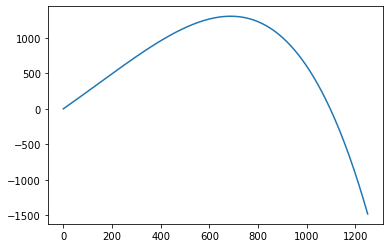

In [216]:
xs = np.linspace(0, 1.25, 750)
orig_xs = xs.copy()
xs = xs[200:600]

def fn(x):
    return (8*x) + (2* x**2) - (3* x**3) - (5* x**4)

plt.plot(orig_xs*1000, fn(orig_xs)*300)

## I mutated the original function using parameters randomly selected from a normal distribution to generate multiple new functions (where the original would be expected to be the aggregate of the others).

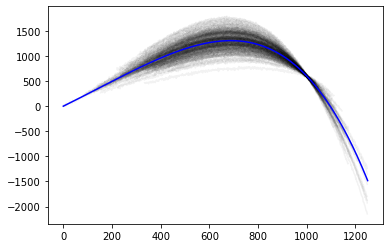

In [240]:
def random_noise1(noise_limit, frame_number):
    return np.random.normal(0, noise_limit, frame_number)


def random_noise2(noise_limit, frame_number):
    return np.random.normal(0, noise_limit, frame_number)


def f(x, noise_limit, frame_number):
    noise = noise_limit
    a, b, c, d = [8, 2, 3, 5] + noise
    return ((a*x) + (b* x**2) - (c* x**3) - (d* x**4))



def modified_trajectories(original):
    noise = random_noise2(1, 1)[0]

    norm_noise = int(np.random.normal(0, 75, 1)[0])
    if norm_noise < -200:
        norm_noise = -200
    if norm_noise > 149:
        norm_noise = 149


    lagged_traj = original[200+norm_noise:600+norm_noise]
    new_trajectory = f(lagged_traj, noise, len(xs))

    new_trajectory = new_trajectory + random_noise1(0.05, len(xs))

    return lagged_traj, new_trajectory

trajectories = np.asarray([modified_trajectories(orig_xs) for i in range(0, 200)])

for i in trajectories:
    plt.plot(i[0]*1000, i[1]*300, c='k', alpha=0.05)
plt.plot(orig_xs*1000, fn(orig_xs)*300, c='b')

## I then generated 20 offshoot functions that follow the same direction, but can be very dissimilar to the original function

/Users/creynold/anaconda3/envs/circ_test/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


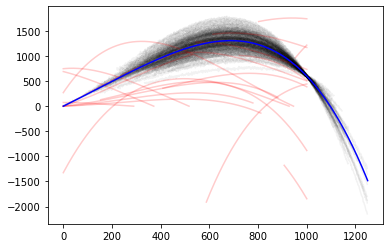

In [241]:
def random_functions():
    x = np.linspace(np.random.uniform(low=0.1, high=1, size=1)[0], np.random.random_integers(low=0, high=1,
                                                                                            size=1)[0], len(xs))
    a, b, d, c = [np.random.uniform(0, 10) for i in range(4)]
    func = (a*x) + (b* x**2) - (c* x**3) - (d* x**4)
    posneg = np.random.randint(low=0, high=2)
    if posneg == 0:
        func = func[::-1]

    return (x, func)

new_functions = np.asarray([random_functions() for i in range(0, 20)])


for i in trajectories:
    plt.plot(i[0]*1000, i[1]*300, c='k', alpha=0.05)
for i in new_functions:
    plt.plot(i[0]*1000, i[1]*300, c='r', alpha=0.2)
plt.plot(orig_xs*1000, fn(orig_xs)*300, c='b')


## Then, I added spots completely randomly to represent noisy lighting

/Users/creynold/anaconda3/envs/circ_test/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1600 + 1) instead
  


(400, 2, 100)


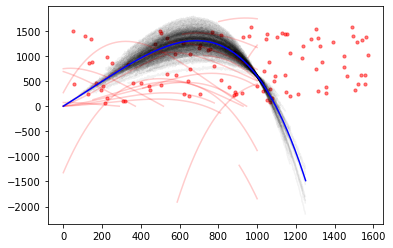

In [258]:
spot_noise = np.asarray([[np.random.random_integers(low=0, high=1600, size=100), np.random.random_integers(low=0, high=1600, size=100)]
              for i in range(0, len(xs))])


for i in trajectories:
    plt.plot(i[0]*1000, i[1]*300, c='k', alpha=0.05)
for i in new_functions:
    plt.plot(i[0]*1000, i[1]*300, c='r', alpha=0.2)

plt.scatter(spot_noise[0,0], spot_noise[0,1], c='r', alpha=0.5, s=10)

    
plt.plot(orig_xs*1000, fn(orig_xs)*300, c='b')

print(spot_noise.shape)

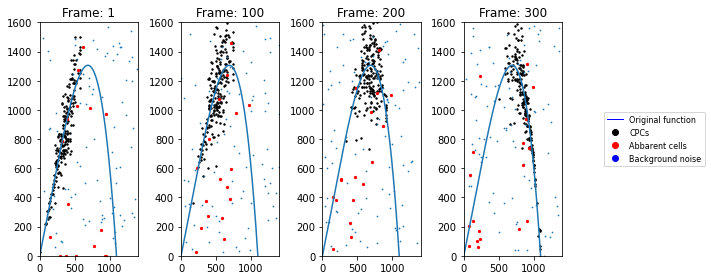

In [260]:



fig, ax = plt.subplots(1, 5, figsize=[10,4])

legs = [Line2D([0],[0], linewidth=1, color='blue'), Line2D([0],[0], linewidth=0, marker='o', color='k'),
        Line2D([0], [0], linewidth=0, marker='o', color='r'), Line2D([0],[0], linewidth=0, marker='o', color='blue')]
for n, i in enumerate([0, 99, 199, 299]):
    ax[n].scatter(trajectories[:,0,i]*1000+ random_noise1(1, 1),
                  trajectories[:,1,i]*300, c='k', s=2)

    ax[n].scatter(spot_noise[i,0], spot_noise[i,1], s=0.51)
    ax[n].scatter(new_functions[:,0,i]*1000+ random_noise1(1, 1),
                  new_functions[:,1,i]*300, c='r', s=5)
    ax[n].plot(orig_xs*1000, fn(orig_xs)*300)
    ax[n].set_ylim(0, 1600)
    ax[n].set_xlim(0, 1400)
    ax[n].set_title('Frame: {}'.format(i+1))
ax[4].axis('off')
ax[4].legend(legs, ['Original function', 'CPCs', 'Abbarent cells', 'Background noise'], loc='center', fontsize=8)
plt.tight_layout()
plt.show()


## After this, we can store each frame into a movie similar to our CPC migration microscopy time-lapses